# K-Nearest Neighbours

We previously learned how to generate synthetic data for experimenting with Machine Learning algorithms. We shall now study the effect of the hyperparameter 'k' in the K-Nearest Neighbours algorithm using synthetic data.

In [1]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

First, let us generate 2-dimensional data for a two-class problem, using the function below. For each class, generate 100 points from a 2D Gaussian distribution.

In [2]:
# Function for generating 2d 2-class data
def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    ### BEGIN SOLUTION
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))
    ### END SOLUTION

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(X[:100,0], X[:100,1], color = 'b', label = 'Class 1')
    plt.scatter(X[100:,0], X[100:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    params = [class1Mean, class1Cov, class2Mean, class2Cov]
    
    return X,y,params

Now for each class, we will generate a Gaussian distribution with unit covariance. Let the means for each class be at (0,0) and (4,4) respectively. Set the parameters `class1Mean, class1Cov, class2Mean and class2Cov` to generate this data.

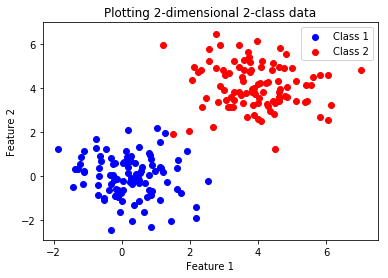

In [3]:
### BEGIN SOLUTION
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [4, 4]
class2Cov = [[1, 0], [0,1]]
### END SOLUTION
X,y,params = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

Now classify the generated data with the K-Nearest Neighbours algorithm, and study the variation in performance from k=1 up to k=25. Use 40% of the data for testing the model, and 60% for training.

In [4]:
def classify_KNN(X,y):
    # Splitting the data into training and validation sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

    ### BEGIN SOLUTION
    # Setting up arrays to store training and test accuracies
    neighbors = np.arange(1,25)
    train_accuracy =np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i,k in enumerate(neighbors):
        #Setup a knn classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k, p=2)

        #Fit the model
        knn.fit(X_train, y_train)

        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)
        #Compute accuracy on the test set
        test_accuracy[i] = knn.score(X_test, y_test)
    ### END SOLUTION    
    return train_accuracy, test_accuracy

def plot(accuracy, num_neighbours=25):

    #Generating accuracy plots
    neighbors=np.arange(1,num_neighbours)
    plt.title('k-NN Testing Accuracy on varying number of neighbors')
    plt.plot(neighbors, accuracy, label='Testing Accuracy')
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()

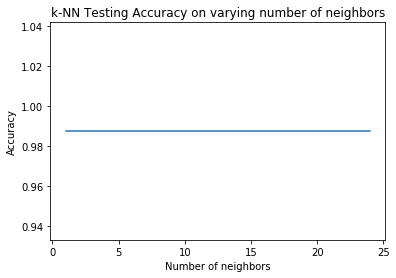

In [5]:
train_accuracy, test_accuracy = classify_KNN(X,y)
plot(test_accuracy)

Now generate a similar dataset with means at (0,0) and (0.5,0.5) instead, and run the classifier again. Observe the performance of the classifier with 'k'.

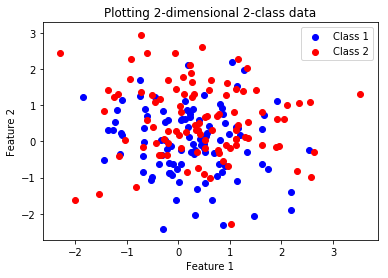

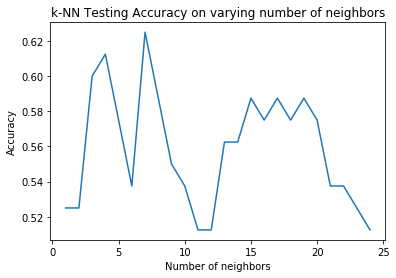

In [6]:
### BEGIN SOLUTION
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [0.5, 0.5]
class2Cov = [[1, 0], [0,1]]

X,y,params = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

train_accuracy, test_accuracy = classify_KNN(X,y)
### END SOLUTION
plot(test_accuracy)

Now generate the dataset with means at (0,0) and (1,1), and run the classifier again. Observe the performance of the classifier with 'k'. Is the trend different from the previous examples?

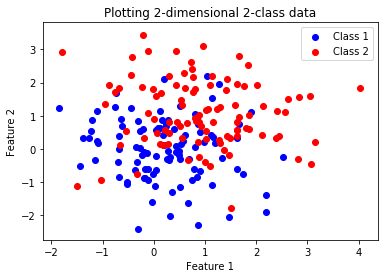

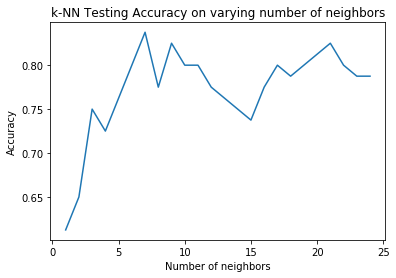

In [7]:
### BEGIN SOLUTION
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [1, 1]
class2Cov = [[1, 0], [0,1]]

X,y,params = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

train_accuracy, test_accuracy = classify_KNN(X,y)
### END SOLUTION
plot(test_accuracy)

Based on the above experiments, try to make a conclusion about how the number of neighbours 'k' for effective classification depends on the dataset.

- When the data is very well separated, k=1 will be sufficient since the neighbours are mostly of the same class.

- Similarly, when the data is highly mixed (as the means get closer and closer to each other), a very low value of k will give good performance. At the extreme case, the means are coincident, and one can't do better than a 50-50 guess, hence k=1 will work best.

- However, when there is an intermediate level of overlap, k=1 will not be optimal and higher values of k will give better performance.